In [1]:
# Алексеев Д.П.(ABD-13, DSU-4)_Homework
# на тему "Машинное обучение и Data Science" (#2)
import pandas as pd

In [ ]:
# Загружаем данные в переменную df из файла homework.csv

In [2]:
df = pd.read_csv('E:\\Netology\\BigData\\ABD-13\\Practice\\Lec2_materials\\homework.csv')

In [3]:
df.head(10)

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
5,11,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0
6,12,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311,15.2,396.90,13.27,18.9
7,13,0.09378,12.5,7.87,0,0.524,5.889,39.0,5.4509,5,311,15.2,390.50,15.71,21.7
8,14,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26,20.4
9,15,0.63796,0.0,8.14,0,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2


In [4]:
import matplotlib.pyplot as plt

In [ ]:
# Построить scatter график по параметрам crim, medv

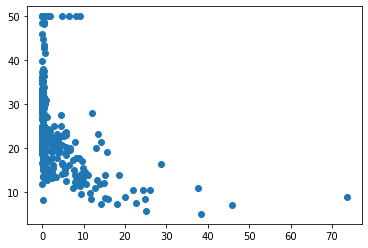

In [5]:
plt.scatter(df.crim, df.medv)

In [ ]:
# Построить scatter график по параметрам rm, medv

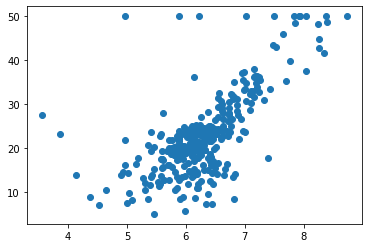

In [6]:
plt.scatter(df.rm, df.medv)

In [ ]:
# Из построенных выше графиков можно сделать вывод об отсутствии выраженной линейной зависимости 
# стоимости дома от уровня преступности в райное ('crim'), зато есть зависимость от количества комнат в доме ('rm').
# Следовательно, в качестве входящего параметра X предпочтительно выбрать именно 'rm'.
# Тем не менее, оценим выборочно взаимосвязь остальных переменных с ценой дома, построив графики и для них тоже
# (вдруг что-то подойдет лучше, чем 'rm'):

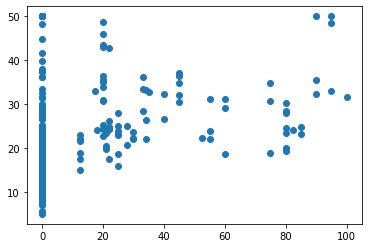

In [21]:
plt.scatter(df.zn, df.medv)
# линейная взаимосвязь df.zn и df.medv не выражена

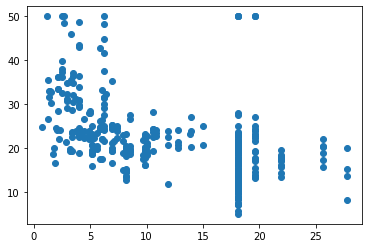

In [22]:
plt.scatter(df.indus, df.medv)
# линейная взаимосвязь df.indus и df.medv также не выражена

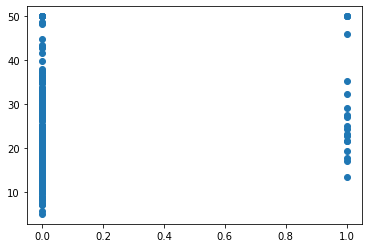

In [23]:
plt.scatter(df.chas, df.medv)
# линейная взаимосвязь df.chas ("dummy-переменной") и df.medv отсутствует

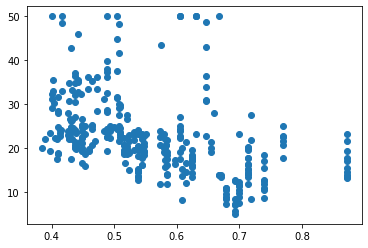

In [24]:
plt.scatter(df.nox, df.medv)
# линейная взаимосвязь df.nox и df.medv также не выражена

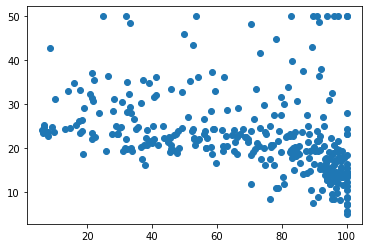

In [26]:
plt.scatter(df.age, df.medv)
# линейная взаимосвязь df.age и df.medv также не выражена

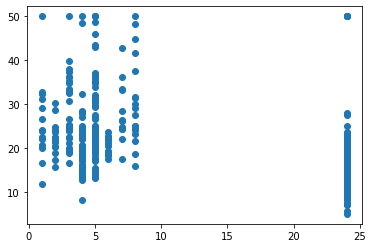

In [71]:
plt.scatter(df.rad, df.medv)
# линейная взаимосвязь df.rad и df.medv также не выражена

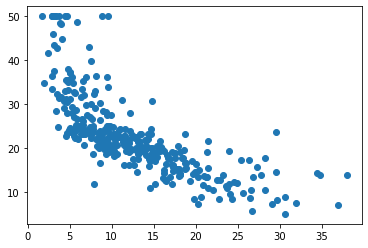

In [27]:
plt.scatter(df.lstat, df.medv)
# выражена обратная линейная зависимость стоимости дома от 'lstat' (доли "малообеспеченного населения" в районе): 
# чем выше доля "малообеспеченного населения" в районе, тем ниже стоимость домов.
# Полагаю, что параметр 'lstat' тоже можно включить в выборку для модели.

In [72]:
# Сформировать X и y из df, выбрав нужные колонки
X, y = df[['rm', 'lstat']], df['medv']

In [9]:
from sklearn.model_selection import train_test_split

In [ ]:
# Разбить данные на данные для обучения и проверки

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Создать и обучить модель LinearRegression

In [74]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [53]:
from sklearn.metrics import mean_squared_error, r2_score

In [75]:
# Оценить качество на тестовой выборке
# Рассчитаем средневзвешенную квадратичную ошибку(MSE):
y_test_predict = model.predict(X_test)
print("MSE_test:", mean_squared_error(y_test, y_test_predict))

MSE_test: 25.86063041885505


In [77]:
# определим коэфф-т детерминации на тестовой выборке (чем ближе к 1, тем точнее модель)
r2_score(y_test, y_test_predict)

0.6762613617564726

In [79]:
# сравним с аналогичными значениями для тренировочной выборки:
y_train_predict = model.predict(X_train)
print("MSE_train:", mean_squared_error(y_train, y_train_predict))

MSE_train: 31.90595036018061


In [80]:
# определим коэфф-т детерминации на тренировочной выборке
r2_score(y_train, y_train_predict)

0.6242325691348738

In [ ]:
# Вывод: судя по тому, что коэфф-т детерминации для тестовой выборки (0.68) получился выше, чем для тренировочной (0.62),
# а значения MSE, наоборот, меньше (MSE_test: 25.86; MSE_train: 31.91),
# то модель получилась вполне адекватной (но "переобученной"???)